## Pretrained Vectors

In [5]:
GLOVE_DIR = '../data/glove/'
GLOVE_ZIP = GLOVE_DIR + 'glove.6B.50d.zip'

In [6]:
import zipfile

zip_ref = zipfile.ZipFile(GLOVE_ZIP, 'r')
zip_ref.extractall(GLOVE_DIR)
zip_ref.close()

In [7]:
import numpy as np

def load_glove_vectors(fn):
    print("Loading Glove Model")
    with open( fn,'r', encoding='utf8') as glove_vector_file:
        model = {}
        for line in glove_vector_file:
            parts = line.split()
            word = parts[0]
            embedding = np.array([float(val) for val in parts[1:]])
            model[word] = embedding
        print("Loaded {} words".format(len(model)))
    return model

glove_vectors = load_glove_vectors('../data/glove/glove.6B.50d.txt')

Loading Glove Model
Loaded 400000 words


In [2]:
glove_vectors['dog']

array([ 0.11008  , -0.38781  , -0.57615  , -0.27714  ,  0.70521  ,
        0.53994  , -1.0786   , -0.40146  ,  1.1504   , -0.5678   ,
        0.0038977,  0.52878  ,  0.64561  ,  0.47262  ,  0.48549  ,
       -0.18407  ,  0.1801   ,  0.91397  , -1.1979   , -0.5778   ,
       -0.37985  ,  0.33606  ,  0.772    ,  0.75555  ,  0.45506  ,
       -1.7671   , -1.0503   ,  0.42566  ,  0.41893  , -0.68327  ,
        1.5673   ,  0.27685  , -0.61708  ,  0.64638  , -0.076996 ,
        0.37118  ,  0.1308   , -0.45137  ,  0.25398  , -0.74392  ,
       -0.086199 ,  0.24068  , -0.64819  ,  0.83549  ,  1.2502   ,
       -0.51379  ,  0.04224  , -0.88118  ,  0.7158   ,  0.38519  ])

In [3]:
glove_vectors['cat']

array([ 0.45281 , -0.50108 , -0.53714 , -0.015697,  0.22191 ,  0.54602 ,
       -0.67301 , -0.6891  ,  0.63493 , -0.19726 ,  0.33685 ,  0.7735  ,
        0.90094 ,  0.38488 ,  0.38367 ,  0.2657  , -0.08057 ,  0.61089 ,
       -1.2894  , -0.22313 , -0.61578 ,  0.21697 ,  0.35614 ,  0.44499 ,
        0.60885 , -1.1633  , -1.1579  ,  0.36118 ,  0.10466 , -0.78325 ,
        1.4352  ,  0.18629 , -0.26112 ,  0.83275 , -0.23123 ,  0.32481 ,
        0.14485 , -0.44552 ,  0.33497 , -0.95946 , -0.097479,  0.48138 ,
       -0.43352 ,  0.69455 ,  0.91043 , -0.28173 ,  0.41637 , -1.2609  ,
        0.71278 ,  0.23782 ])

## Vector to Image

In [14]:
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

%matplotlib inline

def to_vector(glove_vectors, word):
    vector =  glove_vectors.get(word.lower())
    if vector is None:
        vector  [0] * 50
    return vector 

def show_vector(glove_vectors, word):
    vector = to_vector(glove_vectors, word)
    to_image(vector, word)
    return vector
    
def to_image(vector, word=''):
    fig, ax = plt.subplots(1,1)
    ax.tick_params(axis='both', which='both',
                   left=False, 
                   bottom=False, 
                   top=False,
                   labelleft=False,
                   labelbottom=False)
    ax.grid(False)
    ax.bar(range(len(vector)), vector, 0.5)
    ax.text(s=word, x=1, y=vector.max()+0.5)
    return vector


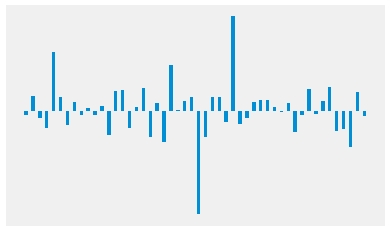

In [15]:
man = to_image(to_vector(glove_vectors, 'man'))

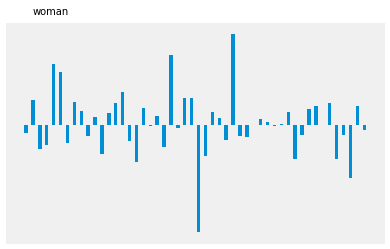

In [6]:
woman = to_image(to_vector(glove_vectors, 'woman'))

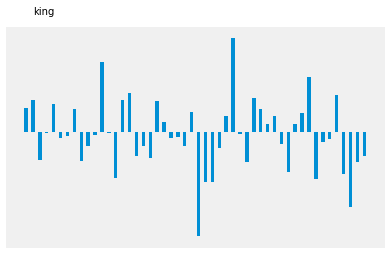

In [7]:
king = to_image(to_vector(glove_vectors, 'king'))

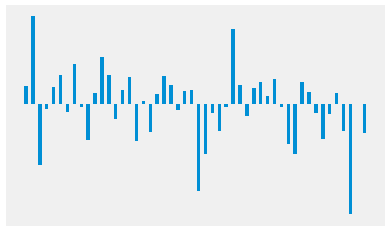

In [16]:
queen = to_image(to_vector(glove_vectors, 'queen'))

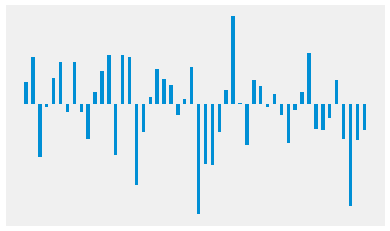

In [12]:
to_image(king - man + woman)

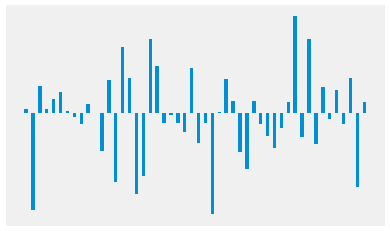

In [18]:
diff = to_image(king - man + woman -queen)

In [19]:
max(diff)

0.9250799999999999

In [20]:
max(man)

2.6124